In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam



In [2]:

# Define dataset path
train_dir = "dataset/train"
test_dir = "dataset/test"
img_size = (224, 224)
batch_size = 32

# Data augmentation and loading
datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_data = datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')


Found 272 images belonging to 5 classes.
Found 69 images belonging to 5 classes.


In [3]:

# Function to create and compile model
def build_model(base_model, num_classes):
    base_model.trainable = False
    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train VGG16 Model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16_model = build_model(vgg16_base, train_data.num_classes)
history_vgg16 = vgg16_model.fit(train_data, validation_data=test_data, epochs=10)

# Train ResNet50 Model
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50_model = build_model(resnet50_base, train_data.num_classes)
history_resnet50 = resnet50_model.fit(train_data, validation_data=test_data, epochs=10)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


58892288/58889256 [==============================] - 15s 0us/step
Epoch 1/10
9/9 [==============================] - 45s 5s/step - loss: 0.4872 - acc: 0.8934 - val_loss: 0.0168 - val_acc: 1.0000
Epoch 2/10
9/9 [==============================] - 39s 4s/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 3/10
9/9 [==============================] - 36s 4s/step - loss: 9.7511e-04 - acc: 1.0000 - val_loss: 8.3286e-04 - val_acc: 1.0000
Epoch 4/10
9/9 [==============================] - 36s 4s/step - loss: 4.3302e-04 - acc: 1.0000 - val_loss: 4.1252e-04 - val_acc: 1.0000
Epoch 5/10
9/9 [==============================] - 34s 4s/step - loss: 3.0462e-04 - acc: 1.0000 - val_loss: 3.4201e-04 - val_acc: 1.0000
Epoch 6/10
9/9 [==============================] - 34s 4s/step - loss: 2.3643e-04 - acc: 1.0000 - val_loss: 2.9937e-04 - val_acc: 1.0000
Epoch 7/10
9/9 [==============================] - 34s 4s/step - loss: 2.0710e-04 - acc: 1.0000 - val_loss: 2.4871e-04 - val_acc: 1.000

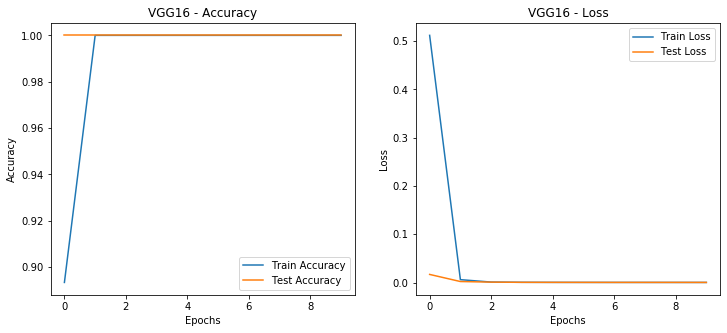

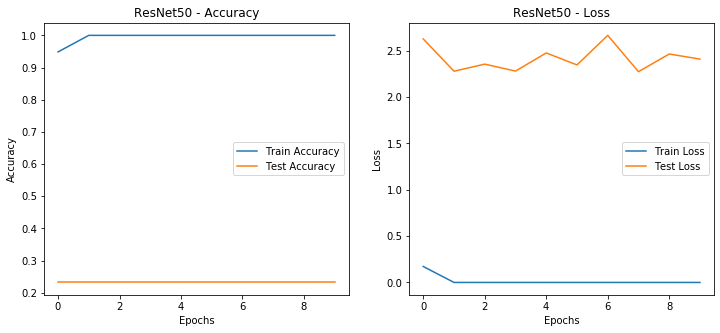

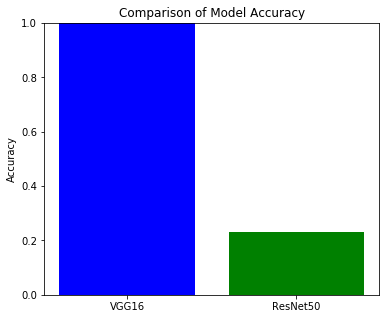

VGG16 Accuracy: 1.00
ResNet50 Accuracy: 0.23


In [6]:

# Plot accuracy and loss graphs
def plot_graphs(history, title):
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'], label='Train Accuracy')
    plt.plot(history.history['val_acc'], label='Test Accuracy')
    plt.title(title + ' - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(title + ' - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_graphs(history_vgg16, "VGG16")
plot_graphs(history_resnet50, "ResNet50")

# Compare model accuracy
vgg16_acc = max(history_vgg16.history['val_acc'])
resnet50_acc = max(history_resnet50.history['val_acc'])

plt.figure(figsize=(6, 5))
plt.bar(['VGG16', 'ResNet50'], [vgg16_acc, resnet50_acc], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim([0, 1])
plt.show()

print(f"VGG16 Accuracy: {vgg16_acc:.2f}")
print(f"ResNet50 Accuracy: {resnet50_acc:.2f}")